In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from pandas_datareader import data as pdr
import yfinance as yf

In [6]:
from datetime import datetime

In [8]:
yf.pdr_override()

stock_symbols = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 1, 1)

stock_data = {}  

for stock in stock_symbols:
    stock_data[stock] = pdr.get_data_yahoo(stock, start_date, end_date)

print(stock_data['AAPL'].head())
print(stock_data['GOOG'].head())
print(stock_data['MSFT'].head())
print(stock_data['AMZN'].head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.374802   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.657639   
2023-01-05  127.129997  127.769997  124.760002  125.019997  124.325073   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.899506   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.426575   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  
                 Open       High     

In [26]:
stock_data['AAPL']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.374802,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.657639,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.325081,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.899521,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426575,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700


In [9]:
stock_data['AAPL'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,172.256681,173.857520,170.981880,172.549000,172.121111,5.921703e+07
std,17.530359,17.261055,17.535099,17.331672,17.504123,1.777392e+07
min,126.010002,127.769997,124.169998,125.019997,124.325073,2.404830e+07
25%,161.555000,162.387501,160.699997,162.112499,161.457561,4.781208e+07
50%,175.244995,177.025002,173.840004,175.475006,175.244133,5.507750e+07
75%,186.805000,188.095001,185.174995,187.330002,187.177860,6.574292e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.543573e+08


In [10]:
stock_data['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

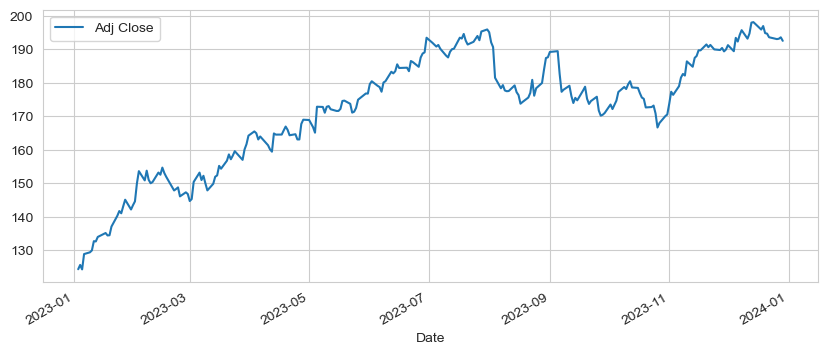

In [11]:
stock_data['AAPL']['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

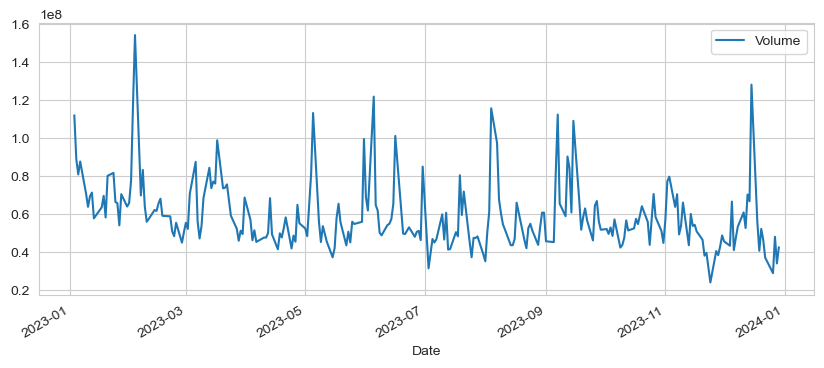

In [12]:
stock_data['AAPL']['Volume'].plot(legend=True,figsize=(10,4))

In [25]:
moving_avg = [10,20,50]

for ma in moving_avg:
    column_name = "MA %s days" %(str(ma))
    stock_data['AAPL'][column_name] = stock_data['AAPL']['Adj Close'].rolling(window=ma).mean()

In [26]:
stock_data['AAPL']

,Open,High,Low,Close,Adj Close,Volume,MA 10 days,MA 20 days,MA 50 days
Date,,,,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.374802,112117500,NaN,NaN,NaN
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.657639,89113600,NaN,NaN,NaN
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.325073,80962700,NaN,NaN,NaN
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.899506,87754700,NaN,NaN,NaN
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426575,70790800,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800,195.747002,193.668501,185.306513
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300,195.734003,193.831501,185.595219
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700,195.578001,193.969001,185.888522


<Axes: xlabel='Date'>

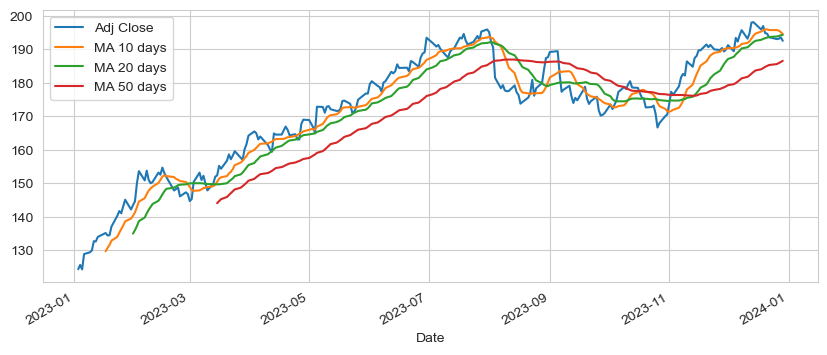

In [28]:
stock_data['AAPL'][['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(subplots=False,figsize=(10,4))

In [29]:
stock_data['AAPL']['Daily Return'] = stock_data['AAPL']['Adj Close'].pct_change()

<Axes: xlabel='Date'>

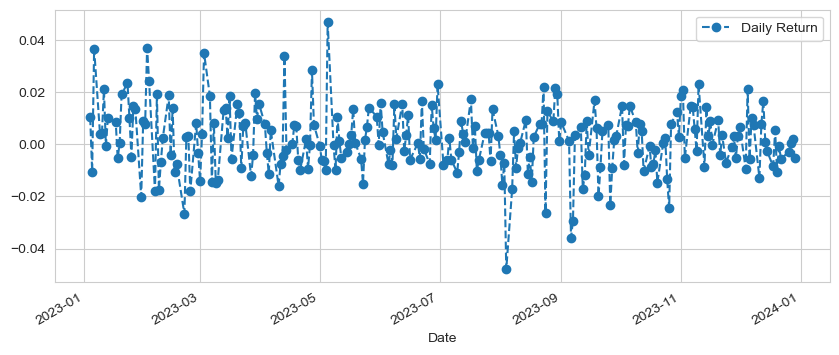

In [31]:
stock_data['AAPL']['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\kunal\AppData\Local\Temp\ipykernel_31472\3891182734.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data['AAPL']['Daily Return'].dropna(),bins=100,color='purple')
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Return', ylabel='Density'>

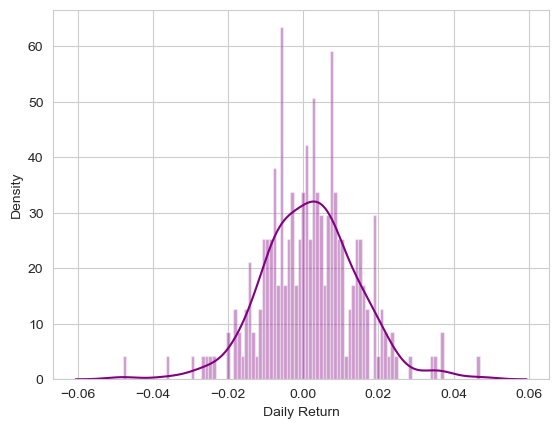

In [33]:
sns.distplot(stock_data['AAPL']['Daily Return'].dropna(),bins=100,color='purple')

<Axes: >

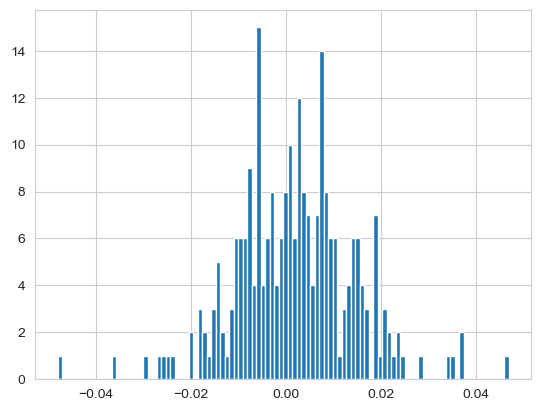

In [34]:
stock_data['AAPL']['Daily Return'].hist(bins=100)

<Axes: xlabel='Date'>

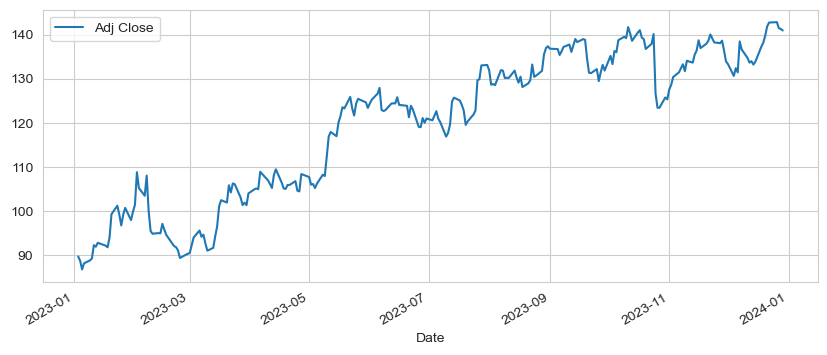

In [36]:
stock_data['GOOG']['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

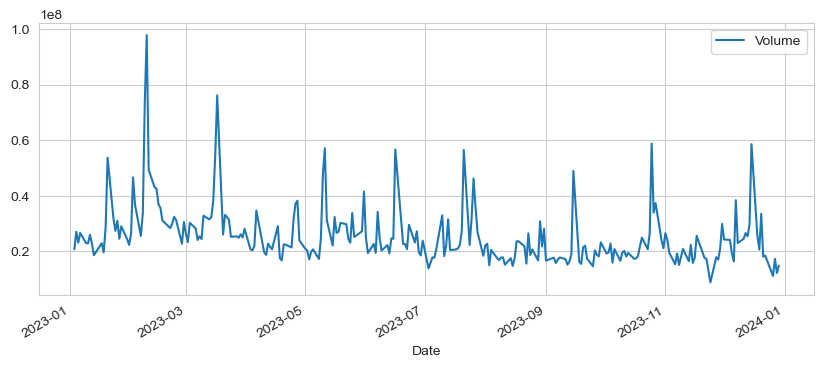

In [39]:
stock_data['GOOG']['Volume'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

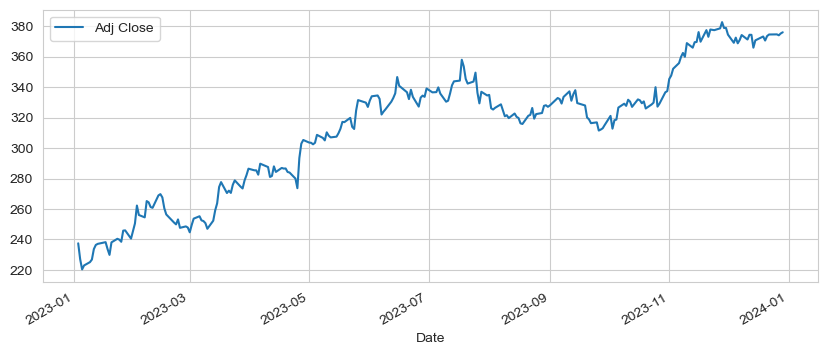

In [38]:
stock_data['MSFT']['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

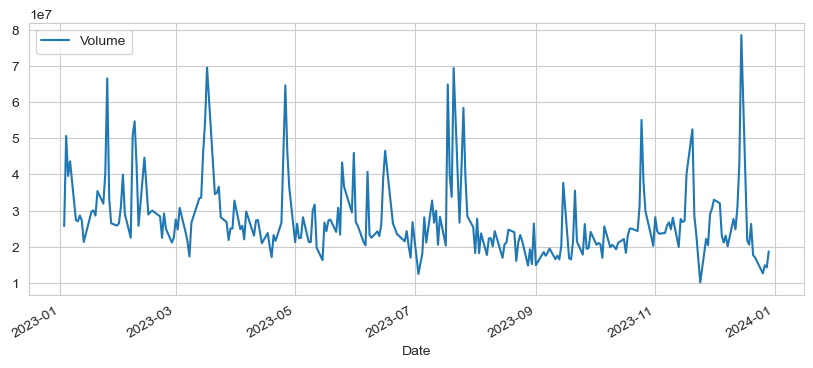

In [40]:
stock_data['MSFT']['Volume'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

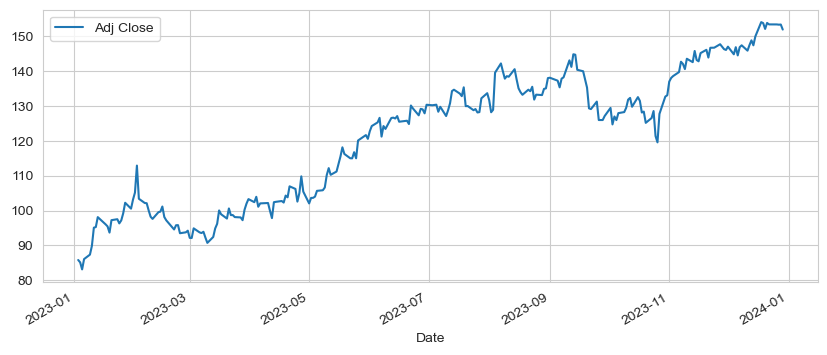

In [41]:
stock_data['AMZN']['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

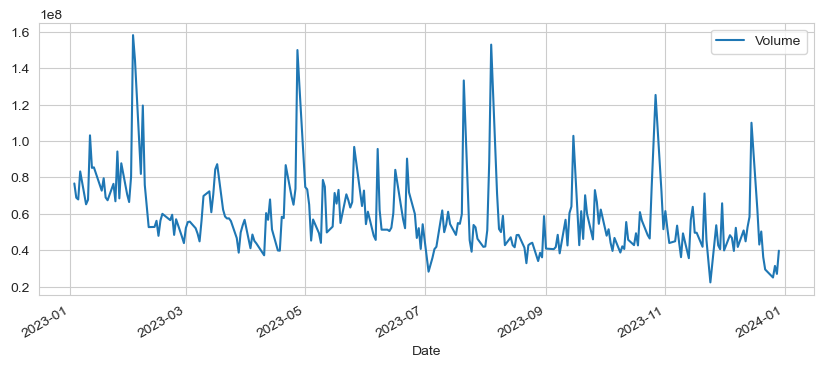

In [42]:
stock_data['AMZN']['Volume'].plot(legend=True,figsize=(10,4))

In [45]:
moving_avg = [10,20,50]

for ma in moving_avg:
    column_name = "MA %s days" %(str(ma))
    stock_data['GOOG'][column_name] = stock_data['GOOG']['Adj Close'].rolling(window=ma).mean()

In [49]:
stock_data['GOOG']

,Open,High,Low,Close,Adj Close,Volume,MA 10 days,MA 20 days,MA 50 days
Date,,,,,,,,,
2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500,NaN,NaN,NaN
2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500,NaN,NaN,NaN
2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100,NaN,NaN,NaN
2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26612600,NaN,NaN,NaN
2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700,136.882001,135.933500,134.831200
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100,137.694002,136.172000,134.916000
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400,138.474002,136.313000,134.935000


<Axes: xlabel='Date'>

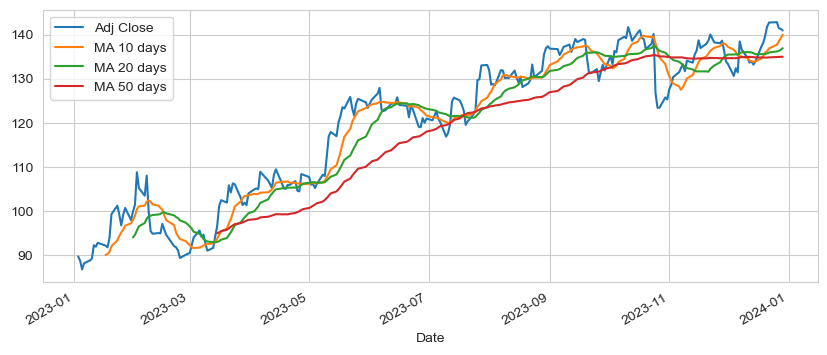

In [50]:
stock_data['GOOG'][['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(subplots=False,figsize=(10,4))

In [51]:
moving_avg = [10,20,50]

for ma in moving_avg:
    column_name = "MA %s days" %(str(ma))
    stock_data['MSFT'][column_name] = stock_data['MSFT']['Adj Close'].rolling(window=ma).mean()

<Axes: xlabel='Date'>

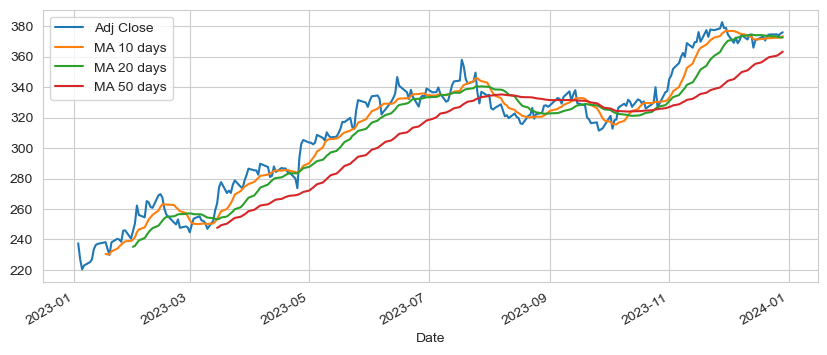

In [52]:
stock_data['MSFT'][['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(subplots=False,figsize=(10,4))

In [53]:
moving_avg = [10,20,50]

for ma in moving_avg:
    column_name = "MA %s days" %(str(ma))
    stock_data['AMZN'][column_name] = stock_data['AMZN']['Adj Close'].rolling(window=ma).mean()

<Axes: xlabel='Date'>

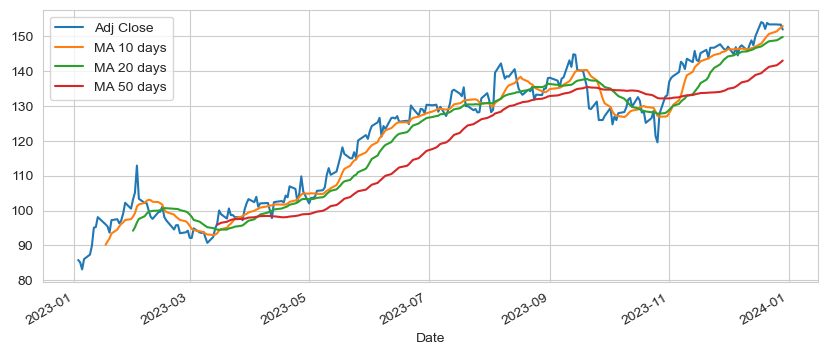

In [54]:
stock_data['AMZN'][['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(subplots=False,figsize=(10,4))

In [55]:
stock_data['GOOG']['Daily Return'] = stock_data['GOOG']['Adj Close'].pct_change()

<Axes: xlabel='Date'>

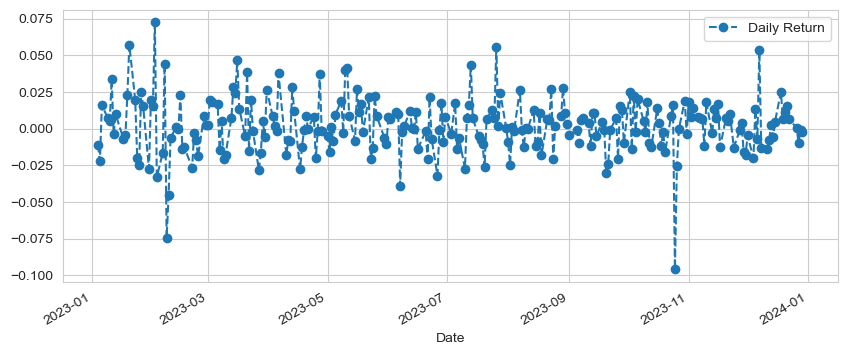

In [57]:
stock_data['GOOG']['Daily Return'].plot(legend=True,figsize=(10,4),ls='--',marker='o')

In [58]:
stock_data['MSFT']['Daily Return'] = stock_data['MSFT']['Adj Close'].pct_change()

<Axes: xlabel='Date'>

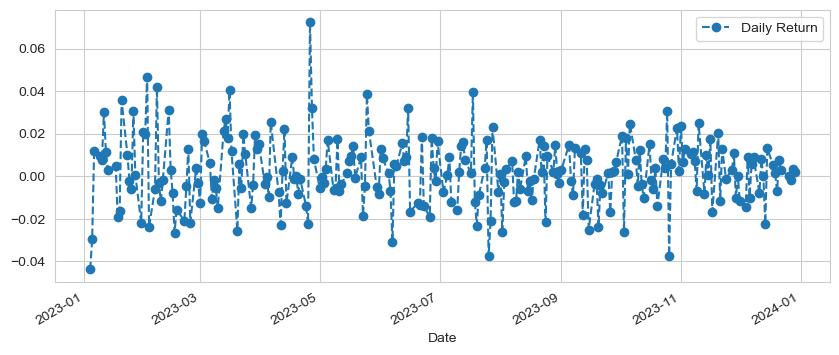

In [59]:
stock_data['MSFT']['Daily Return'].plot(legend=True,figsize=(10,4),ls='--',marker='o')

In [60]:
stock_data['AMZN']['Daily Return'] = stock_data['AMZN']['Adj Close'].pct_change()

<Axes: xlabel='Date'>

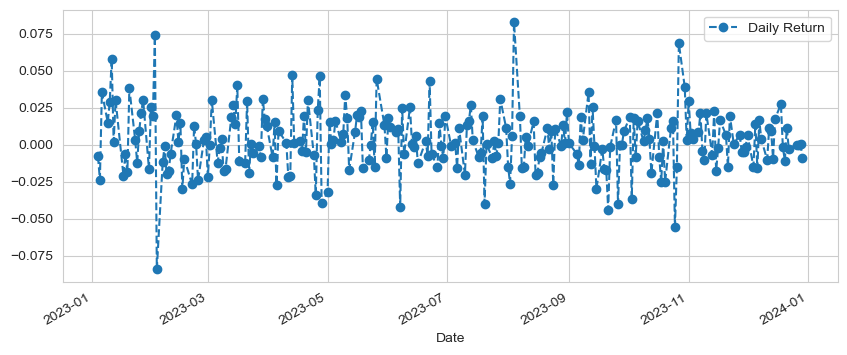

In [61]:
stock_data['AMZN']['Daily Return'].plot(legend=True,figsize=(10,4),ls='--',marker='o')

C:\Users\kunal\AppData\Local\Temp\ipykernel_31472\1035850317.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data['GOOG']['Daily Return'].dropna(),bins=100,color='green')
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Return', ylabel='Density'>

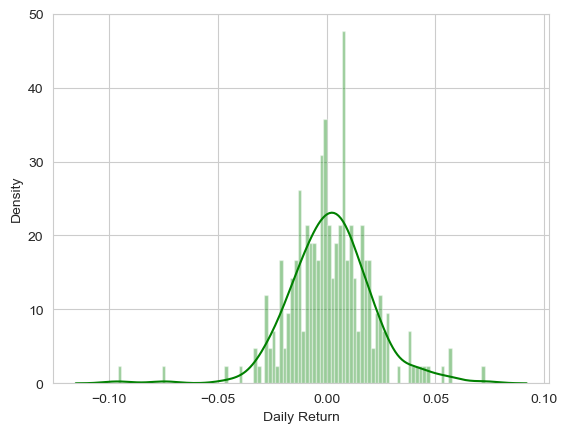

In [62]:
sns.distplot(stock_data['GOOG']['Daily Return'].dropna(),bins=100,color='green')

C:\Users\kunal\AppData\Local\Temp\ipykernel_31472\1465640513.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data['AMZN']['Daily Return'].dropna(),bins=100,color='orange')
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Return', ylabel='Density'>

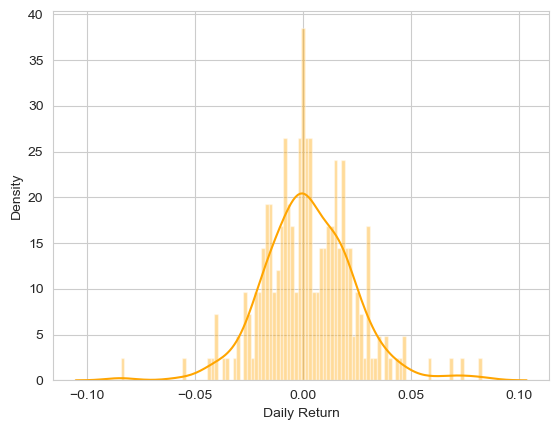

In [64]:
sns.distplot(stock_data['AMZN']['Daily Return'].dropna(),bins=100,color='orange')

C:\Users\kunal\AppData\Local\Temp\ipykernel_31472\1022300967.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data['MSFT']['Daily Return'].dropna(),bins=100,color='yellow')
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Daily Return', ylabel='Density'>

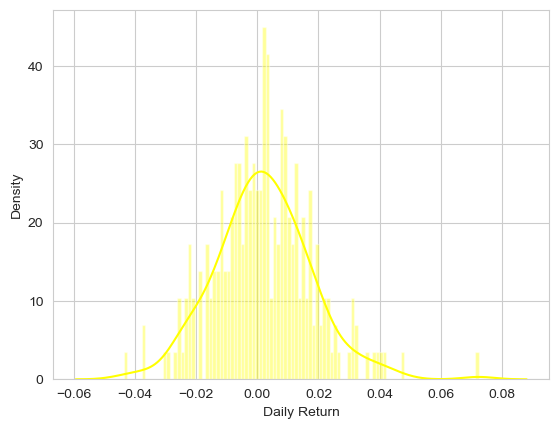

In [67]:
sns.distplot(stock_data['MSFT']['Daily Return'].dropna(),bins=100,color='yellow')

In [74]:
closing_df = pd.DataFrame()

for stock in stock_symbols:
    closing_df[stock] = stock_data[stock]['Adj Close']

In [76]:
closing_df.head()


,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-01-03,124.374802,89.699997,237.474350,85.820000
2023-01-04,125.657639,88.709999,227.086456,85.139999
2023-01-05,124.325073,86.769997,220.356125,83.120003
2023-01-06,128.899506,88.160004,222.953079,86.080002
2023-01-09,129.426575,88.800003,225.123825,87.360001


In [77]:
tech_rets = closing_df.pct_change()

In [78]:
tech_rets

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,0.010314,-0.011037,-0.043743,-0.007924
2023-01-05,-0.010605,-0.021869,-0.029638,-0.023726
2023-01-06,0.036794,0.016019,0.011785,0.035611
2023-01-09,0.004089,0.007260,0.009736,0.014870
...,...,...,...,...
2023-12-22,-0.005547,0.006488,0.002784,-0.002730
2023-12-26,-0.002841,0.000701,0.000214,-0.000065
2023-12-27,0.000518,-0.009663,-0.001575,-0.000456


D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


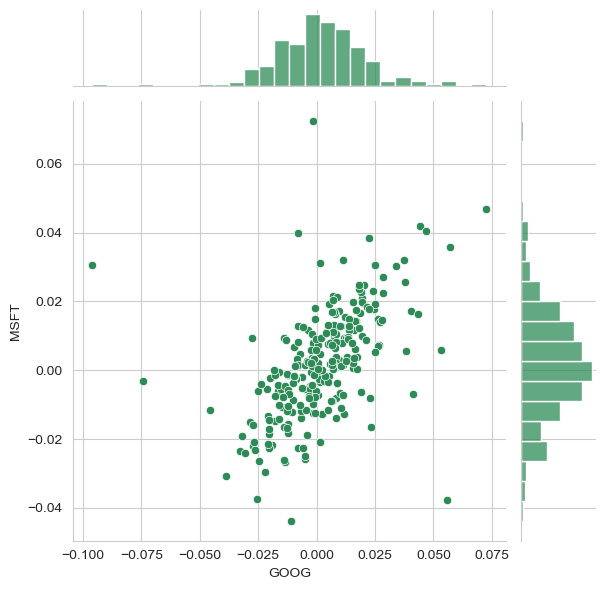

In [81]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter',color='seagreen')

D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


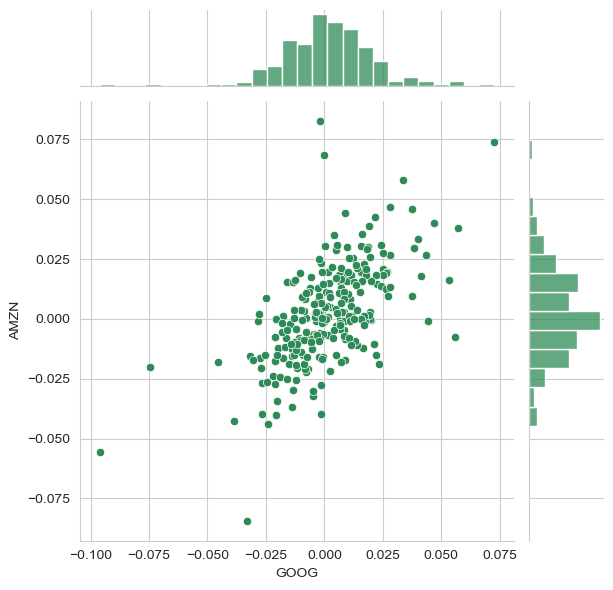

In [82]:
sns.jointplot(x='GOOG',y='AMZN',data=tech_rets,kind='scatter',color='seagreen')

D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


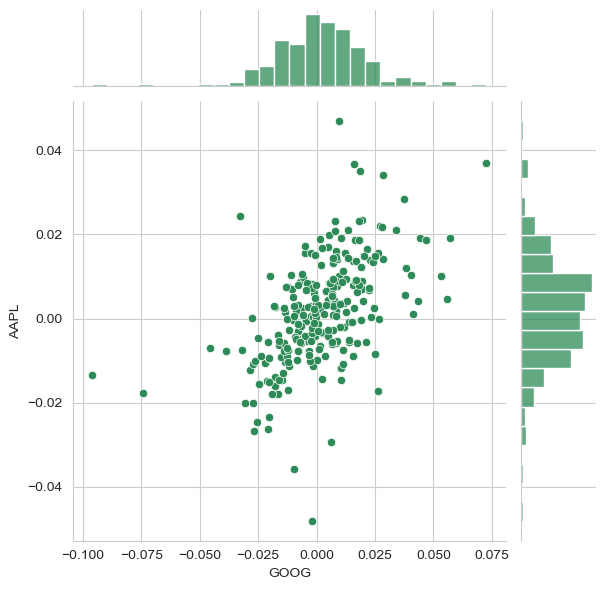

In [83]:
sns.jointplot(x='GOOG',y='AAPL',data=tech_rets,kind='scatter',color='seagreen')

D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


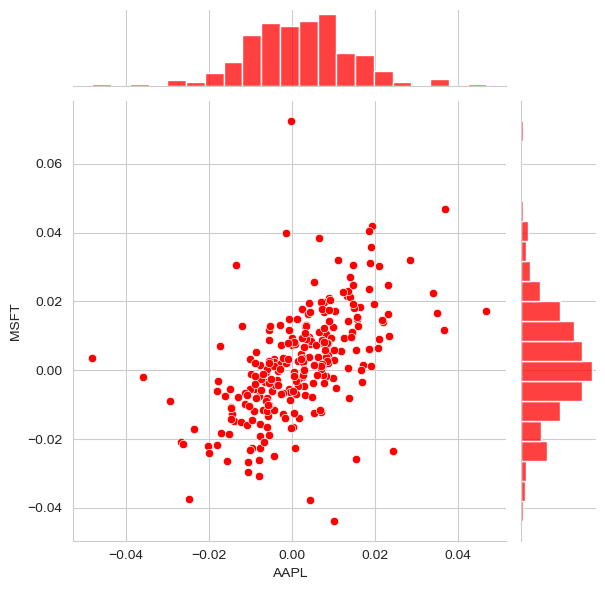

In [84]:
sns.jointplot(x='AAPL',y='MSFT',data=tech_rets,kind='scatter',color='red')

D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


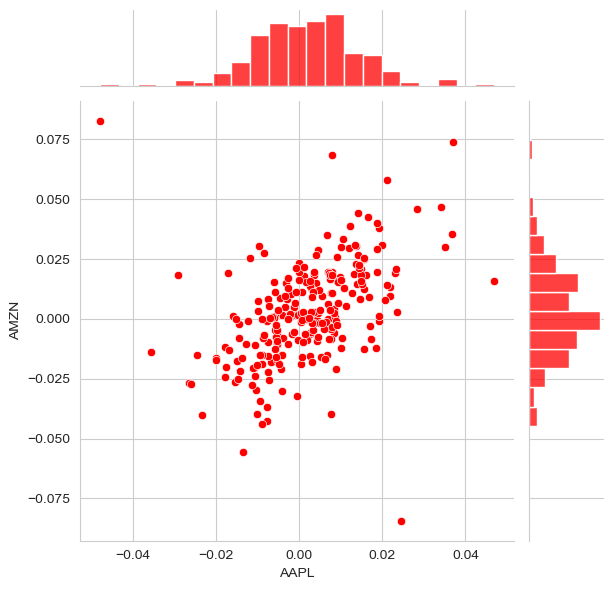

In [85]:
sns.jointplot(x='AAPL',y='AMZN',data=tech_rets,kind='scatter',color='red')

D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


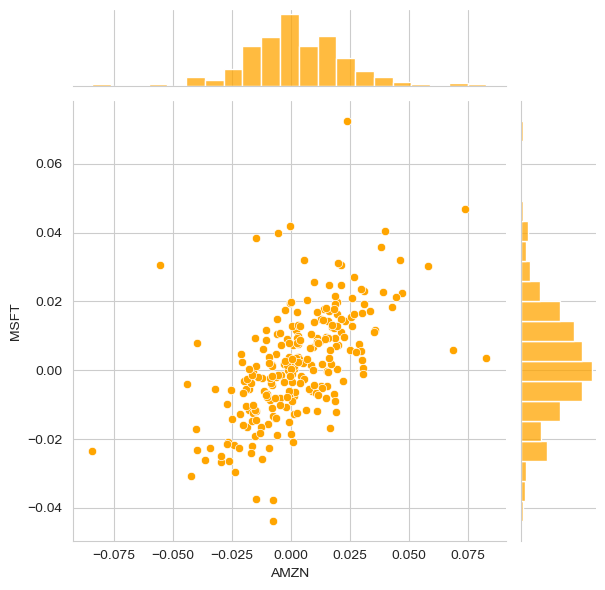

In [87]:
sns.jointplot(x='AMZN',y='MSFT',data=tech_rets,kind='scatter',color='orange')

In [88]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,0.010314,-0.011037,-0.043743,-0.007924
2023-01-05,-0.010605,-0.021869,-0.029638,-0.023726
2023-01-06,0.036794,0.016019,0.011785,0.035611
2023-01-09,0.004089,0.007260,0.009736,0.014870


D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

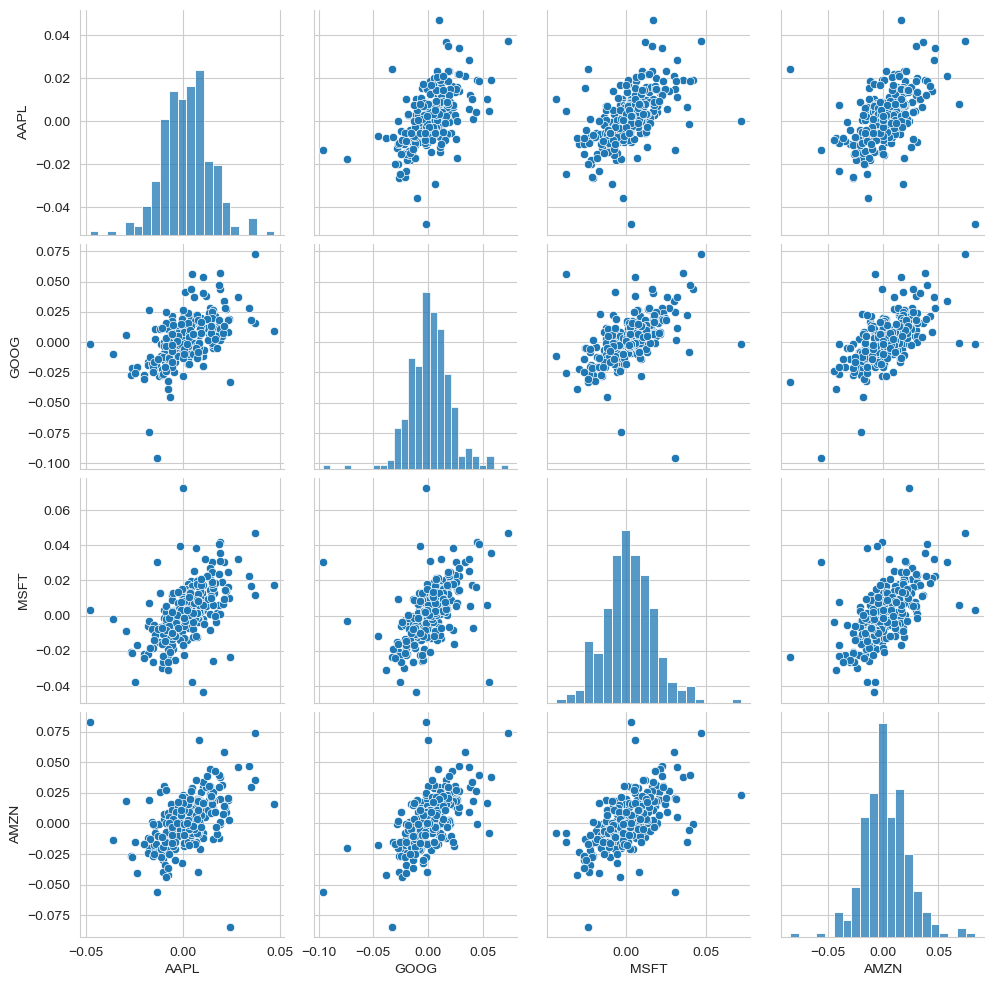

In [89]:
sns.pairplot(tech_rets.dropna())

D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

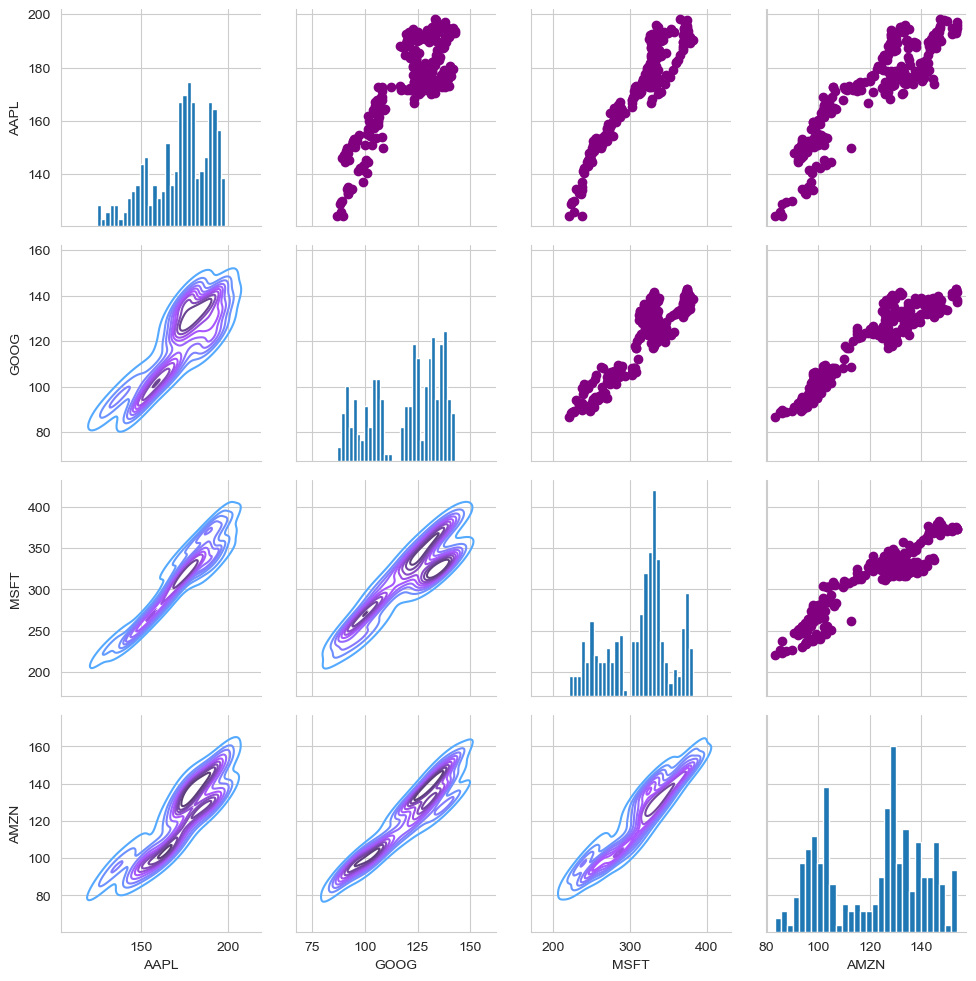

In [94]:
return_fig = sns.PairGrid(closing_df)

return_fig.map_upper(plt.scatter,color='purple')
return_fig.map_lower(sns.kdeplot,cmap='cool_d')
return_fig.map_diag(plt.hist,bins=30)

In [98]:
tr = tech_rets.dropna().corr()

<Axes: >

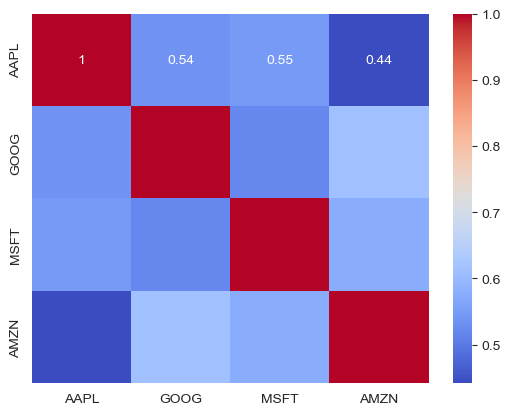

In [101]:
sns.heatmap(tr,annot=True,cmap='coolwarm')

In [102]:
closing = closing_df.dropna().corr()

<Axes: >

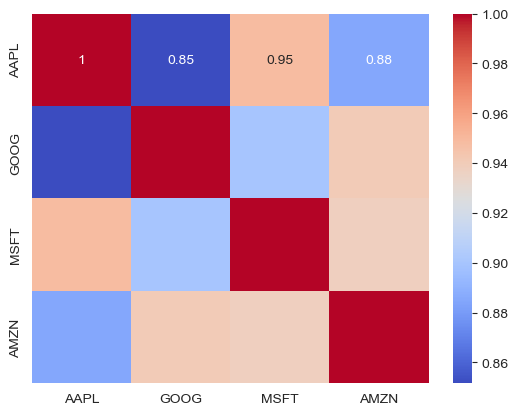

In [104]:
sns.heatmap(closing,annot=True,cmap='coolwarm')

In [105]:
rets = tech_rets.dropna()

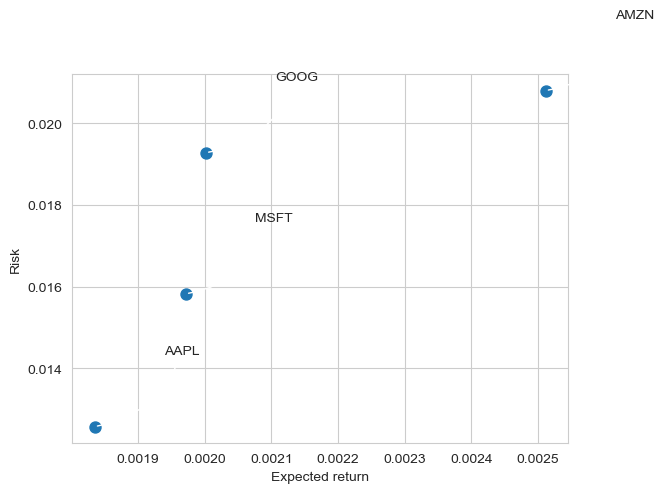

In [109]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

D:\Users\kunal\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


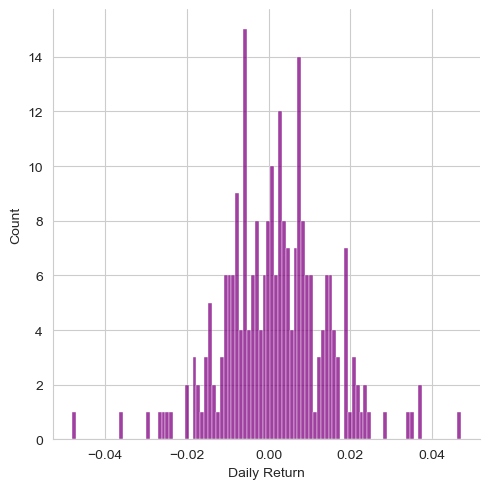

In [115]:
sns.displot(stock_data['AAPL']['Daily Return'].dropna(),bins=100,color='purple')

In [116]:
rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-01-04,0.010314,-0.011037,-0.043743,-0.007924
2023-01-05,-0.010605,-0.021869,-0.029638,-0.023726
2023-01-06,0.036794,0.016019,0.011785,0.035611
2023-01-09,0.004089,0.007260,0.009736,0.014870
2023-01-10,0.004456,0.004955,0.007617,0.028732


In [117]:
rets['AAPL'].quantile(0.05)

-0.01717651358146146

In [118]:
rets['GOOG'].quantile(0.05)

-0.0260817838827045

In [119]:
rets['MSFT'].quantile(0.05)

-0.02294024287920362

In [120]:
rets['AMZN'].quantile(0.05)

-0.02731209661029126